In [ ]:
# imports
import os
import cv2
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
import sklearn as skl
import sklearn.preprocessing as preproc
import numpy as np
import keras as k
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Flatten, Dense, Dropout, MaxPool2D
from keras.models import Sequential
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from imblearn.over_sampling import SMOTENC
import tensorflow as tf
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
import math
import shutil
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import History 
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
import matplotlib.pyplot as plt

history=History()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#GoogleDrive folder import
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
#Creation of images folder
!mkdir /images

In [ ]:
#3 unzip the folder containing images in images folder

!unzip -q /gdrive/"My Drive"/Untitledfolder.zip -d /images

In [ ]:
#Creation of csv directory and copy of datasets
!mkdir /csv

!cp /gdrive/My\ Drive/esteso_064.csv /csv #training
!cp /gdrive/My\ Drive/orig_016.csv /csv #validation
!cp /gdrive/My\ Drive/orig_02.csv /csv #test

In [ ]:
image_path = "/images//Untitledfolder" #path to folder with images
csv_test='/csv/orig_02.csv' #path to csv containing only 20% of original dataset, used for testing
csv_train='/csv/esteso_064.csv' #path to csv containing 64% of original dataset (80% of the remaining set after test splitting), used as train set
csv_validation='/csv/orig_016.csv' # path to csv containing 16% (20% of the remaining set after test splitting), used ad validation set

In [ ]:
# extract images from the dataset and return an array
def load_images(array):
    images = list()
    for index in range(0,len(array)):
        img_id = array.iloc[index]
        elem = os.path.join(image_path, img_id)
        elem = elem + ".jpg"
        img = cv2.imread(elem)
        images.append(np.asarray(img)) 
    return np.asarray(images)

In [ ]:
def new_classifier1():
    # Set the CNN model 
    input_shape = (150, 200, 3)
    build_shape=(None,150,200,3)
    num_classes = 7
    #Adding regularizer for activity regulation
    model = Sequential()
    model.add(BatchNormalization())
    model.add(Conv2D(20, kernel_size=(5, 5),activation='relu',padding = 'Same', input_shape = input_shape))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(140,kernel_size=(3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(50,kernel_size=(3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.build(build_shape)
    model.summary()
   
    opt = k.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def new_classifier2():
    # Set the CNN model 
    input_shape = (150, 200, 3)
    build_shape=(None,150,200,3)
    num_classes = 7
    #Adding regularizer for activity regulation
    model = Sequential()
    model.add(BatchNormalization())
    model.add(Conv2D(20, kernel_size=(5, 5),activation='relu',padding = 'Same', input_shape = input_shape))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(140,kernel_size=(3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(50,kernel_size=(3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.build(build_shape)
    model.summary()
   
   #tensorflow suggesteed parameters
    opt = k.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=10e-8)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def new_classifier3():
    # Set the CNN model 
    input_shape = (150, 200, 3)
    build_shape=(None,150,200,3)
    num_classes = 7
    #Adding regularizer for activity regulation
    model = Sequential()
    model.add(BatchNormalization())
    model.add(Conv2D(20, kernel_size=(5, 5),activation='relu',padding = 'Same', input_shape = input_shape))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(140,kernel_size=(3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(50,kernel_size=(3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.build(build_shape)
    model.summary()
   
   #keras suggested parameters
    opt = k.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=10e-8)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def new_classifier4():
    # Set the CNN model 
    input_shape = (150, 200, 3)
    build_shape=(None,150,200,3)
    num_classes = 7
    #Adding regularizer for activity regulation
    model = Sequential()
    model.add(BatchNormalization())
    model.add(Conv2D(20, kernel_size=(5, 5),activation='relu',padding = 'Same', input_shape = input_shape))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(140,kernel_size=(3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(50,kernel_size=(3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.build(build_shape)
    model.summary()
   
   #Adadelta optimizer
    model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#Retrieve the dataset needed for test and train phases
dataset_test = pd.read_csv(csv_test, encoding = "ISO-8859-1")
dataset_train=pd.read_csv(csv_train, encoding = "ISO-8859-1")
dataset_val=pd.read_csv(csv_validation, encoding = "ISO-8859-1")
dataset_test #print dataset_test to show how it is

,dx,image_id
0,0.0,ISIC_0031929
1,0.0,ISIC_0026872
2,0.0,ISIC_0031119
3,0.0,ISIC_0030714
4,0.0,ISIC_0030602
...,...,...
2000,6.0,ISIC_0025606
2001,6.0,ISIC_0025250
2002,6.0,ISIC_0027937
2003,6.0,ISIC_0025680


In [ ]:
#create a new classifier folder
!mkdir /classifiers

#build a classifier and save it
n_cl = new_classifier4()
n_cl.save('/classifiers/cl_fit.h5')
del n_cl

mkdir: cannot create directory ‘/classifiers’: File exists
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 150, 200, 3)       12        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 200, 20)      1520      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 100, 20)       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 75, 100, 20)       80        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 100, 140)      25340     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 50, 140)       0         
_____________________________________________________________

In [ ]:
#retrieve arrays of pixels for every image in train and validation datasets
X_train=np.asarray(load_images(dataset_train["image_id"]))
X_val=np.asarray(load_images(dataset_val["image_id"]))
y_train=(dataset_train["dx"])
y_val=(dataset_val["dx"])
X_train[0]#example of one image

array([[[ 24,  23,  65],
        [ 36,  35,  77],
        [ 53,  52,  94],
        ...,
        [ 20,  19,  45],
        [ 12,   9,  34],
        [  5,   3,  25]],

       [[ 32,  31,  73],
        [ 44,  43,  85],
        [ 61,  60, 102],
        ...,
        [ 27,  25,  54],
        [ 18,  15,  40],
        [ 10,   8,  30]],

       [[ 44,  43,  85],
        [ 56,  55,  97],
        [ 72,  71, 113],
        ...,
        [ 36,  34,  64],
        [ 26,  23,  49],
        [ 18,  15,  40]],

       ...,

       [[114, 116, 151],
        [123, 125, 160],
        [136, 138, 173],
        ...,
        [106, 101, 140],
        [ 84,  81, 120],
        [ 67,  64, 103]],

       [[104, 106, 141],
        [115, 117, 152],
        [128, 130, 165],
        ...,
        [ 92,  89, 128],
        [ 72,  69, 108],
        [ 55,  52,  91]],

       [[ 97,  99, 134],
        [109, 111, 146],
        [124, 126, 161],
        ...,
        [ 82,  79, 118],
        [ 62,  59,  98],
        [ 45,  42,  81]]

In [ ]:
#1hot encoding of labels for both train and validation set
enc = OneHotEncoder(sparse=False)
y_train_shaped = np.array(y_train).reshape(-1,1)
y_val_shaped = np.array(y_val).reshape(-1,1)
enc.fit(y_train_shaped)
y_train_one = enc.transform(y_train_shaped)
y_val_one = enc.transform(y_val_shaped)
y_train_one #example for y_train encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#retrieve the model, than create the callbacks and fit the model
cl_name = "/classifiers/cl_fit.h5"
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('/classifiers/cl_fit.h5', monitor='val_loss', mode='min', save_best_only=True)
cl_fit = k.models.load_model(cl_name)
cl_fit.fit(X_train, y_train_one, batch_size=250, epochs=20 ,shuffle=True, 
           validation_data=(X_val, y_val_one), verbose=1 , callbacks=[history,mc,es])

Train on 30697 samples, validate on 1605 samples
Epoch 1/20
30697/30697 [==============================] - 126s 4ms/step - loss: 0.4475 - accuracy: 0.8671 - val_loss: 0.4549 - val_accuracy: 0.8320
Epoch 2/20
30697/30697 [==============================] - 125s 4ms/step - loss: 0.2217 - accuracy: 0.9080 - val_loss: 0.2055 - val_accuracy: 0.9208
Epoch 3/20
30697/30697 [==============================] - 125s 4ms/step - loss: 0.1736 - accuracy: 0.9281 - val_loss: 0.2156 - val_accuracy: 0.9150
Epoch 4/20
30697/30697 [==============================] - 125s 4ms/step - loss: 0.1371 - accuracy: 0.9435 - val_loss: 0.2183 - val_accuracy: 0.9144
Epoch 5/20
30697/30697 [==============================] - 125s 4ms/step - loss: 0.1088 - accuracy: 0.9559 - val_loss: 0.1452 - val_accuracy: 0.9435
Epoch 6/20
30697/30697 [==============================] - 125s 4ms/step - loss: 0.0859 - accuracy: 0.9656 - val_loss: 0.1416 - val_accuracy: 0.9462
Epoch 7/20
30697/30697 [==============================] - 125s 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


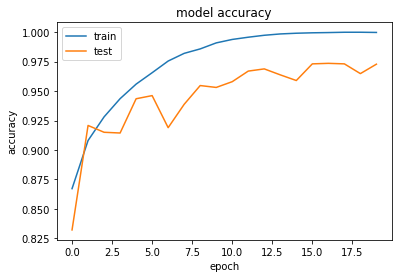

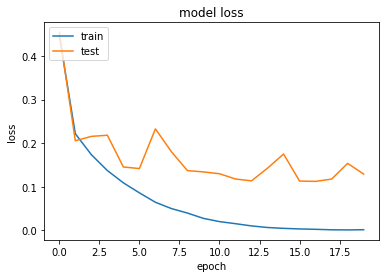

In [ ]:
#plot the history of model to show graphs
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
cl_fit = k.models.load_model("/classifiers/cl_fit.h5")
#load images for test set
test_img = load_images(dataset_test["image_id"])

In [ ]:
#do predictions
predictions2 = cl_fit.predict(test_img)
pred_reverse2 = enc.inverse_transform(predictions2)
print(skl.metrics.classification_report(dataset_test["dx"], pred_reverse2))
print('F1-score: '+ str(round(skl.metrics.f1_score(dataset_test["dx"], pred_reverse2, average='micro'),2)))

              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83        66
         1.0       0.89      0.86      0.88       103
         2.0       0.79      0.89      0.83       220
         3.0       0.73      0.83      0.78        23
         4.0       0.73      0.79      0.76       223
         5.0       0.96      0.94      0.95      1341
         6.0       1.00      0.97      0.98        29

    accuracy                           0.91      2005
   macro avg       0.85      0.87      0.86      2005
weighted avg       0.91      0.91      0.91      2005

F1-score: 0.91


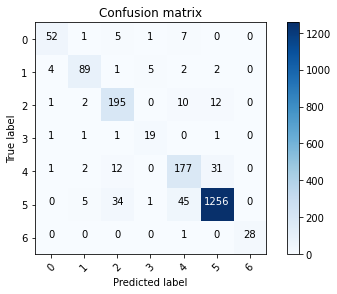

In [ ]:
import itertools
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = skl.metrics.confusion_matrix(dataset_test["dx"], pred_reverse2)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 